**Домашнее задание 4**

Во второй части третьего дз предлагается поработать с несколькими различными датасетами из соревнований на Kaggle, все данные я выкачал в [папку](https://drive.google.com/drive/folders/1M6NmnFOvCj4Y7Hgc5sFnHK4E6mRkf-lH?usp=sharing). Необходимо создать визуализации в соответствии с заданием, необходимая библиотека для использования будет указана в каждом пункте. Один датасет – одна библиотека для визуализации. Не забывайте подписывать график и оси!

У каждого заданий указано число баллов, которое за него можно получить.
В каждой задаче постарайтесь придумать несколько решений. Решением должен быть Jupyter notebook / ссылка на Colab

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Посмотрите на данные из соревнования [Netflix Movies and TV Shows](https://www.kaggle.com/shivamb/netflix-shows). С использованием библиотеки matplotlib создайте следующие визуализации:

    а. Постройте [круговую диаграмму](https://en.wikipedia.org/wiki/Pie_chart), на которой отобразите распределение долей числа фильмов+сериалов последних четырех лет (2018-2021). Укажите на круговой диаграмме проценты, которые составляет контент каждого года с 2018 по 2021 вкл. от общего числа контента за 2018-2021 гг. Цель – посмотреть на соотношение общего числа снятых фильмов и сериалов за последние 4 года. Было бы неплохо, если год, в которых вышло больше всего контента на платформе, был некоторым образом выделен. (1б).

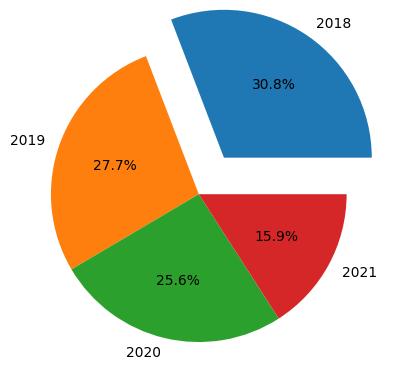

In [2]:
import matplotlib.pyplot as plt

df_netflix = pd.read_csv('/content/drive/MyDrive/netflix_titles.csv')

films = df_netflix[(df_netflix['release_year'] >= 2018) & (df_netflix['release_year'] <= 2021)]               #создаем датафрейм только из фильмов 2018-2021 лет
films_count = films['release_year'].value_counts()                                                            #количество фильмов по годам

special = list(map(lambda x: 0.3 if x == max(films_count.tolist()) else 0, films_count.tolist()))             #выделяем год, в котором вышло больше всего контента

plt.pie(films_count, labels = films_count.index, autopct='%1.1f%%', explode=special)                          #создаем диаграмму
plt.show()                                                                                                    #выводим ее

  б. Постройте точно такой же по содержанию [donut chart](https://datavizcatalogue.com/methods/donut_chart.html) (0.4б)

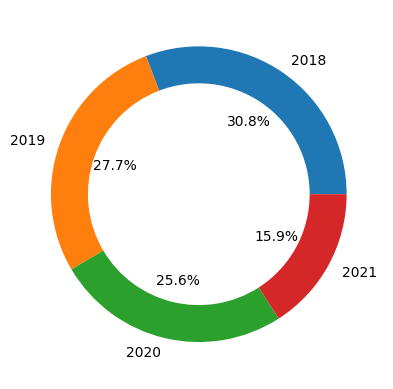

In [3]:
plt.pie(films_count, labels = films_count.index, autopct='%1.1f%%', wedgeprops = {"width": 0.25})             #создаю диаграмму, делая ее "бубликом")
plt.show()                                                                                                    #выводим

  в. Постройте горизонтальный bar plot, в котором сравните число фильмов и сериалов (два горизонтальных стоблца для каждого года) по всем годам. Цель – посмотреть изменение отношения числа фильмов к числу сериалов по годам. Можете использовать для демонстрации этого другой тип графика (0.7б)

<Axes: ylabel='release_year'>

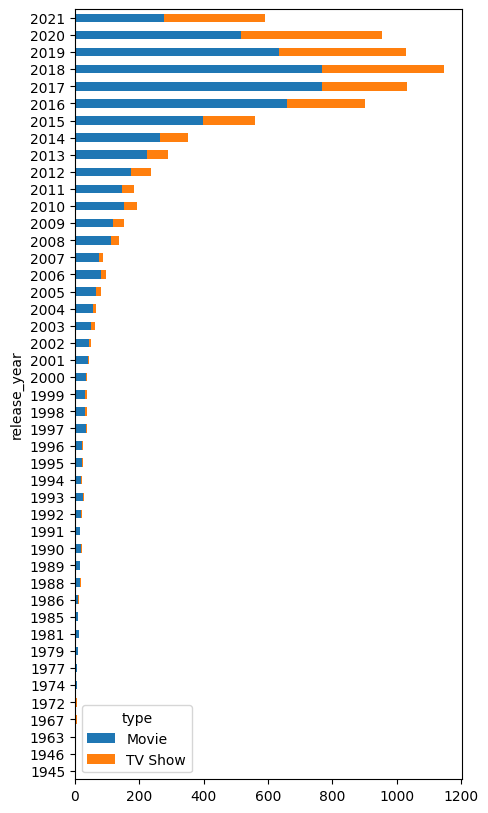

In [4]:
df_new = df_netflix.groupby(['release_year', 'type']).size().unstack(fill_value = 0)                          #группируем по году выпуска и типу
df_new = df_new[(df_new['Movie'] != 0) & (df_new['TV Show'] != 0)]                                            #убираем года, где не было выпущено ни одного фильма или сериала

df_new.plot(kind = 'barh', stacked=True, figsize=(5, 10))                                                     #создаем график

2. Посмотрите на данные соревнования [Heart Failure Prediction](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data). С использованием библиотеки seaborn (основная функция графика должна отрисовываться функцией из seaborn) создайте следующие визуализации:

    а. Нарисуйте на одном графике две линии – число смертей (DEATH_EVENT=1) и не смертей(DEATH_EVENT!=1) в зависимости от возраста. (0.5б)

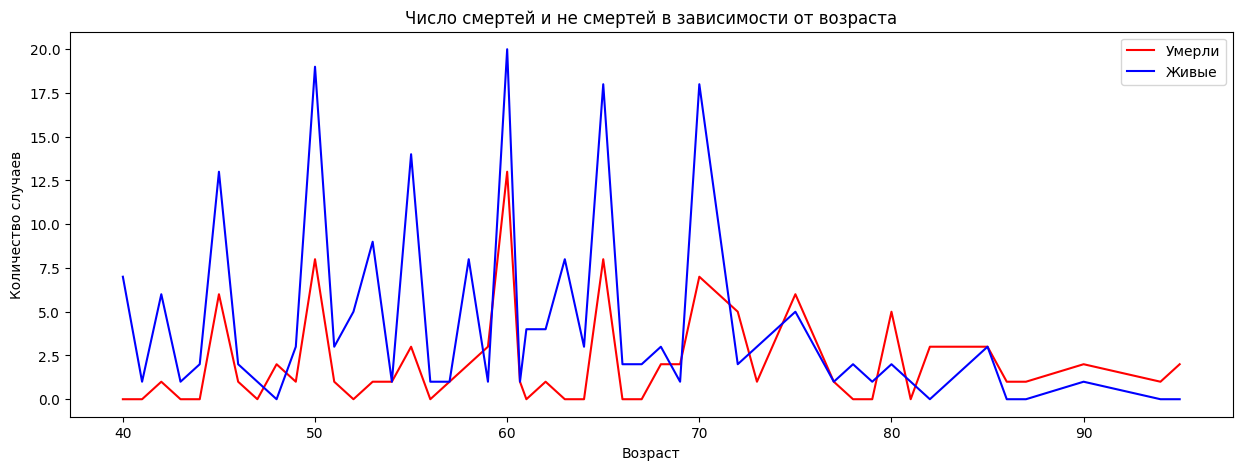

In [5]:
import seaborn as sns
df_clinical = pd.read_csv('/content/drive/MyDrive/heart_failure_clinical_records_dataset.csv')
data = df_clinical.groupby('age')['DEATH_EVENT'].value_counts().unstack(fill_value = 0)                       #группируем по возрасту и статусу жизни
plt.figure(figsize = (15, 5))
sns.lineplot(data = data, x = data.index, y = 1, color = 'red', label = 'Умерли')                             #добавляем линию умерших
sns.lineplot(data = data, x = data.index, y = 0, color = 'blue', label = 'Живые')                             #добавляем линию живых
plt.title('Число смертей и не смертей в зависимости от возраста')                                             #добавляем описание графика
plt.xlabel('Возраст')
plt.ylabel('Количество случаев')
plt.show()

б. Постройте тепловую карту, в которой для каждой пары значений (Процент крови, покидающей сердце при каждом сокращении; Возраст) будет выведено число смертей (соответственно, людей такого возраста и с таким показателем ejection_fraction). Цвет ячейки в тепловой карте будет зависеть от значения этого же показателя. (1.7б). Пример визуализации в конце ноутбука.

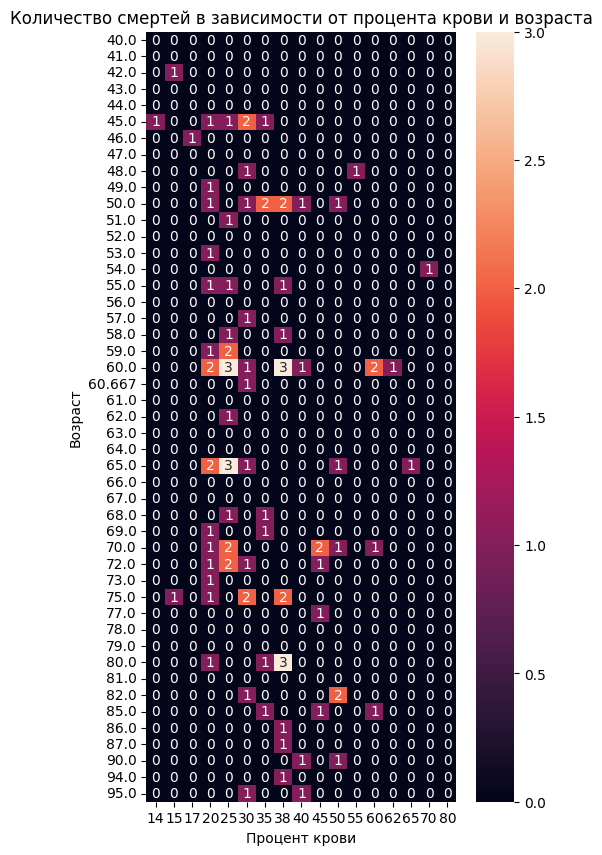

In [6]:
data = df_clinical[["age", "ejection_fraction", "DEATH_EVENT"]]                                                           #оставляем нужные нам графы дф
heatmap_matrix = data.pivot_table(index = "age", columns = "ejection_fraction", values = "DEATH_EVENT", aggfunc = "sum")  #готовим дф для тепловой карты
heatmap_matrix = heatmap_matrix.fillna(0)                                                                                 #заменяем значения NaN на 0
plt.figure(figsize = (5, 10))                                                                                             #задаем размер тепловой карты
sns.heatmap(heatmap_matrix, annot = True)                                                                                 #создаем тепловую карту по дф
plt.xlabel("Процент крови")
plt.ylabel("Возраст")
plt.title("Количество смертей в зависимости от процента крови и возраста")

plt.show()


  в. Добавьте в любой график из задачи 1 стиль оформления из seaborn. (0.1б)

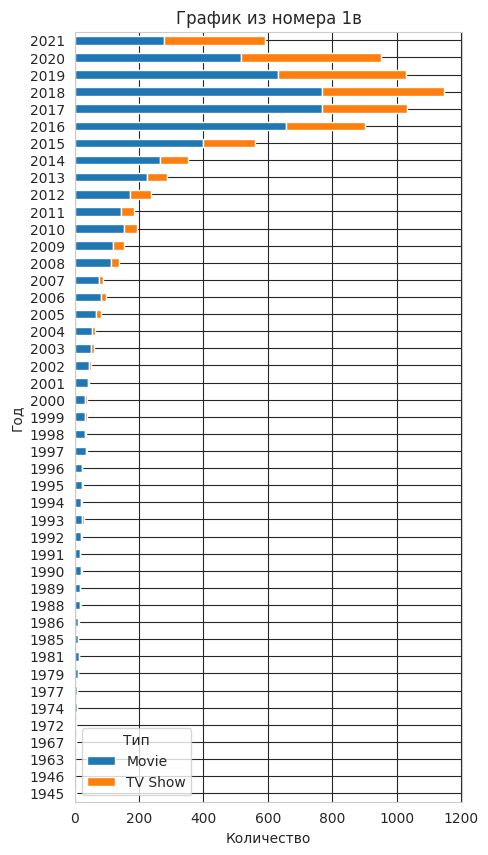

In [7]:
sns.set_style("whitegrid", {"grid.color": ".15"})                                                             #добавляем цвет фона и сетку
df_new = df_netflix.groupby(['release_year', 'type']).size().unstack(fill_value = 0)                          #аналогично номеру 1в
df_new = df_new[(df_new['Movie'] != 0) & (df_new['TV Show'] != 0)]

df_new.plot(kind = 'barh', stacked=True, figsize=(5, 10))                                                     #создаем график
plt.title('График из номера 1в')
plt.xlabel('Количество')
plt.ylabel('Год')
plt.legend(title='Тип')
plt.show()

3. Посмотрите на данные соревнования [FIFA 18 Complete Player Dataset](https://www.kaggle.com/thec03u5/fifa-18-demo-player-dataset). С использованием библиотеки plotly создайте следующие интерактивные визуализации. В пп. а-г используются данные только из файла CompleteDataset.csv:

    а. Посчитаем среднюю зарплату для топ-футболистов из отдельных стран (первые 1000 по зарплате среди всех игроков). Чтобы исключить случаи, при которых футболистов из страны мало и они высокооплачиваемые, наложим ограничение, чтобы в топ-1000 из страны было хотя бы 11 человек (набралась команда).Постройте зависимость средней зарплата топ-футболистов в зависимости от страны, которую они представляют (в виду bar plot). При наведении на соответствующую колонку должно отображаться точное значение средней зарплаты. Не забудьте, что где-то на графике надо указать единицы измерения! (0.8б)

In [19]:
import plotly.express as px

df_fifa = pd.read_csv('/content/drive/MyDrive/FIFA/CompleteDataset.csv')

<ipython-input-19-8b5250c3dd0a>:3: DtypeWarning:

Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.



In [20]:
df_fifa['Wage'] = df_fifa['Wage'].replace({'€': ''}, regex = True)                                                          #убираем евро из зарплаты
df_fifa['Wage'] = df_fifa['Wage'].replace({'K': '000'}, regex = True)                                                       #заменяем K на '000'
df_fifa['Wage'] = df_fifa['Wage'].replace({'M' : '000000'}, regex = True)                                                   #заменяем M на '000000'
df_fifa['Wage'] = df_fifa['Wage'].astype(float)                                                                             #конфертируем зарплату во флоат
top_players = df_fifa.nlargest(1000, 'Wage')                                                                                #берем 1000 самых высокооплачиваемых футболистов
top_countries = top_players['Nationality'].value_counts()[top_players['Nationality'].value_counts() >= 11].index.tolist()   #берем топ стран
top_players = top_players[top_players['Nationality'].isin(top_countries)]

avg_wage = top_players.groupby('Nationality')['Wage'].mean().reset_index()                                                  #сопоставляем страну и среднюю зарплату

fig = px.bar(avg_wage, x='Nationality', y='Wage',                                                                           #создаем график
             labels={'Nationality': 'Страна', 'Wage': 'Средняя зарплата (евро)'},
             title='Средняя зарплата топ-футболистов по странам')
fig.update_layout(xaxis = {"categoryorder":"total descending"})                                                             #сортируем график по убыванию
fig.show()

 б. Проанализируйте график из п. а. Где равномернее распределены зарплаты, а где есть суперзвезда и все остальные? Какая ситуация у сборной России по футболу? (0.3б)

По пикам на таким странам, как Бельгия и Испания, мы видим, что страны с суперзвёздами имеют большую среднюю зарплату, в то время как в России средняя зарплата находится ниже медианной.


  в. Как зарплата согласуется с навыками дриблинга? Исключите из выборки вратаей по понятным причинам, посмотрите на топ-100 самых высокооплачиваемых полевых игроков. Постройте зависимость зарплаты от навыков дриблинга (scatter plot). При наведении мышки на каждую точку должно показываться ИМЯ футболиста, его возраст и зарплата. (0.8б)

In [21]:
top_players = df_fifa[df_fifa['Positioning'] != 'GK'].nlargest(100, 'Wage')                                                 #исключаем вратарей, и выбираем топ 100 самых оплачиваемых игроков
px.scatter(top_players, x = 'Dribbling', y = 'Wage', hover_name = 'Name',                                                   #создаем и выводим график
                 hover_data = {'Name': True, 'Age': True, 'Wage': True},
                 labels = {'Name': "Имя", 'Age': "Возраст", 'Dribbling': 'Дриблинг', 'Wage': 'Зарплата'},
                 title = 'Зависимость зарплаты от навыка дриблинга', color = 'Name')


   г. Проанализируйте выбросы в этой таблице (точки, отстоящие больше всего от основной массы, или же явно не подчиняющиеся какому-то тренду). Как вы думаете, с чем это связано (если вы не интересуетесь футболом, погуглите этих футболистов и попробуйте найти логичное происходящему, согласующееся с интуицией). (0.5б)

Судя по графику, больше всего от остальной массы игроков отличаются Кристиано Роналдно и Месси - являющиеся очень востребованными и популярными футболистами.
Вероятно, из-за этого и возникает такая большая зп у них.